주제 : 철판 제조 공정 데이터를 활용한 불량품 분류

**제조 공정 데이터의 전반적 특성**

- 제조 공정 데이터는 주로 불량률을 예측하여 불량을 일으키는 원인을 제거하거나 재고를 예측하여 수요에 맞는 생산을 진행하는 등의 목적성을 가집니다.
- 다른 데이터에 비하여 데이터를 얻는 과정이 자동화되어 있는 경우가 많아 데이터 퀄리티가 높은 편이며 결측치가 적은 경향성을 가집니다.

## 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/')
path = "./drive/MyDrive/P3C1"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['Faults.NNA', 'Faults27x7_var']


In [4]:
# Working directory를 설정합니다
os.chdir('/content/drive/MyDrive/P3C1/')

In [5]:
import pandas as pd 
import numpy as np

In [6]:
# 데이터를 읽어옵니다.
df = pd.read_csv("Faults.NNA",  delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [7]:
# 칼럼 레이블을 읽어와서 데이터 프레임의 칼럼명으로 지정합니다.
attributes_name=pd.read_csv("Faults27x7_var",  delimiter=' ', header=None)
df.columns=attributes_name[0]

In [8]:
# 칼럼명이 제대로 지정이 되었는지 여부와 데이터 구조를 파악합니다.
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [15]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [14]:
df.columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']

In [9]:
print(df.shape)

(1941, 34)


In [10]:
#Cpu의 개수를 확인합니다. 
n_cpu=os.cpu_count()
print("The number of cpus: ",n_cpu)
n_thread=n_cpu*2
print("Expected number of threads:",n_thread)

The number of cpus:  2
Expected number of threads: 4


## EDA

### 문제 1. 종속변수 범주화 (1) - boolean Seris로 이루어진 list 구성

In [16]:
## 방법 2. pandas.Series.astype을 활용합니다.
conditions=[df['Pastry'].astype(bool),
            df['Z_Scratch'].astype(bool),
            df['K_Scratch'].astype(bool),
            df['Stains'].astype(bool),
            df['Dirtiness'].astype(bool),
            df['Bumps'].astype(bool),
            df['Other_Faults'].astype(bool)]

In [ ]:
## (문제) 방법 3. pandas.Series.astype과 map, lambda를 활용합니다
# conditions_bf에 각 변수들의 Seris로 list를 구성합니다.
# conditions_bf을 사용하고 map, lambda를 활용하여 conditions_bf의 각 원소에 astype 함수를 적용합니다.

# conditions_bf = [df['Pastry'], df['Z_Scratch'], df['K_Scratch'], df['Stains'],
#                  df['Dirtiness'], df['Bumps'], df['Other_Faults']]

# conditions = list(map(lambda i: i.astype(bool), conditions_bf))

In [ ]:
# 잘 진행되었는지 확인합니다.
print(conditions)

In [18]:
print(type(conditions))
print(type(conditions[0]))
print(len(conditions))
print(len(conditions[0]))

<class 'list'>
<class 'pandas.core.series.Series'>
7
1941


### 문제 2. 종속변수 범주화 (2) - numpy.select를 활용한 범주화

In [25]:
choices = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [26]:
# (문제) numpy.select를 사용하고 위에 정의해드린 choices를 인수로 활용하여 범주화를 진행합니다.

df['class'] = np.select(conditions, choices)

In [27]:
# 아래와 같이 class 칼럼이 생성되고 범주화 된 것을 확인할 수 있습니다.
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults,class
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0,Pastry


### 문제 3. EDA - 결측치 확인하기

In [29]:
# (문제) pandas.isnull를 활용해 모든 변수에 대하여 결측치가 얼마나 존재하는지를 파악합니다.

df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scratch                0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
class                    0
dtype: int64

### 문제 4. EDA - 기술통계량 파악하기
 - min과 25% Quantile, max와 75% Quantile을 비교해 이상치 존재가능성에 대해서 파악할 수 있습니다.
 - mean과 50% Quantile을 비교하여 분포의 치우침 정도를 파악할 수 있습니다.
- pandas.Series.value_counts를 활용해 범주화한 종속변수의 기술통계량을 파악합니다.
 - 어떠한 불량타입이 많이 분포하고 적게 분포하는지 파악할 수 있습니다.
 - 적게 분포하는 불량타입의 경우는 예측모형을 구축하는 것이 상대적으로 더 어려울 것입니다.

In [30]:
# (문제) pandas.DataFrame.describe를 활용해 기술통계량을 파악합니다.

df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# (문제) pandas.Series.value_counts를 활용해 범주화한 종속변수의 기술통계량을 파악합니다.

df['class'].value_counts()

Other_Faults    673
Bumps           402
K_Scratch       391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: class, dtype: int64

### 문제 5. 산점도를 통한 변수간의 상관관계 파악

In [32]:
import matplotlib.pyplot as plt

In [34]:
color_code = {'Pastry':'Red', 'Z_Scratch':'Blue', 'K_Scratch':'Green', 'Stains':'Black', 'Dirtiness':'Pink', 'Bumps':'Brown', 'Other_Faults':'Gold'}

In [35]:
# (문제) for문과 위에 정의해드린 dictionary를 활용하여 데이터의 각 행에 해당하는 color값을 지정하는 list를 생성하여 color_list에 저장합니다.

color_list = [color_code.get(i) for i in df.loc[:, 'class']]

In [36]:
# (문제) pandas.plotting.scatter_matrix, 위에서 만든 color_list를 활용해 scatter plot을 그리고 대각원소에는 히스토그램을 출력해봅니다. figsize= [30,30], alpha=0.3,s = 50 으로 지정합니다.
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'], c=color_list, figsize= [30,30], alpha=0.3,s = 50,
                           diagonal='hist')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 문제 6. 범주형 변수의 분포 시각화

In [37]:
import seaborn as sns
sns.set_style("white")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'The number of Defects by Defect type')

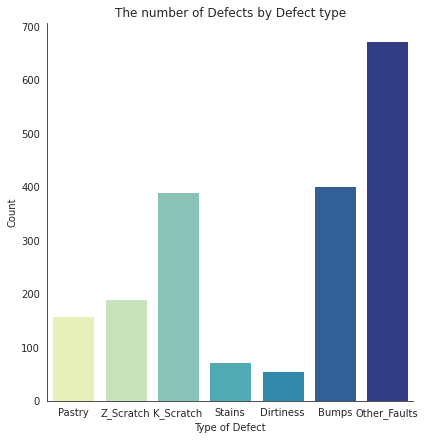

In [38]:
# (문제) seaborn.factorplot을 활용하여 Barplot으로 "class" 변수의 카운트를 표현합니다. 적절한 x축, y축, plot의 title까지 지정해줍니다.

g = sns.factorplot(x='class', data=df, kind='count', palette='YlGnBu', size=6)
g.ax.xaxis.set_label_text('Type of Defect')
g.ax.yaxis.set_label_text('Count')
g.ax.set_title('The number of Defects by Defect type')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


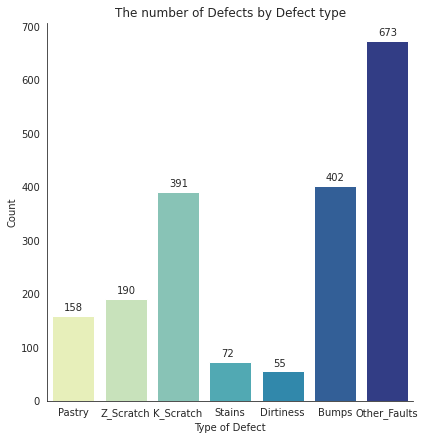

In [39]:
# 이전 cell에서 완성한 코드를 복사 붙여넣기 합니다.
# (문제) Barplot의 bar 상단에 값을 text로 달아줍니다.

g = sns.factorplot(x='class', data=df, kind='count', palette='YlGnBu', size=6)
g.ax.xaxis.set_label_text('Type of Defect')
g.ax.yaxis.set_label_text('Count')
g.ax.set_title('The number of Defects by Defect type')

for p in g.ax.patches:
  g.ax.annotate((p.get_height()), (p.get_x() + 0.23, p.get_height() + 10))

### 문제 7. 상관계수를 활용한 변수간의 상관관계 파악

In [40]:
df_corTarget = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]

In [41]:
# (문제) df_corTarget에 대하여, pandas.DataFrame.corr 을 활용해 correlation을 구한 뒤 corr에 저장.

corr = df_corTarget.corr()
corr

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,0.316662,0.144319,-0.144319,0.136625,0.278075,-0.198461,0.063658,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,0.299390,0.112009,-0.112009,0.106119,0.242846,-0.152680,0.048575,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,-0.049211,0.075164,-0.075164,-0.207640,0.021314,-0.043117,-0.006135,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,-0.049219,0.075151,-0.075151,-0.207644,0.021300,-0.043085,-0.006152,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,-0.155853,-0.235591,0.235591,-0.183735,-0.275289,0.272808,0.017865,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,-0.134240,-0.189250,0.189250,-0.147712,-0.227590,0.306348,0.004507,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,-0.063825,-0.095154,0.095154,-0.058889,-0.111240,0.188825,-0.047511,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,-0.169331,-0.263632,0.263632,-0.204812,-0.301452,0.293691,0.049607,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,-0.023579,0.042048,-0.042048,0.103393,0.358915,-0.044111,0.066748,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,-0.098009,-0.216339,0.216339,-0.128397,0.149675,0.031425,0.065517,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


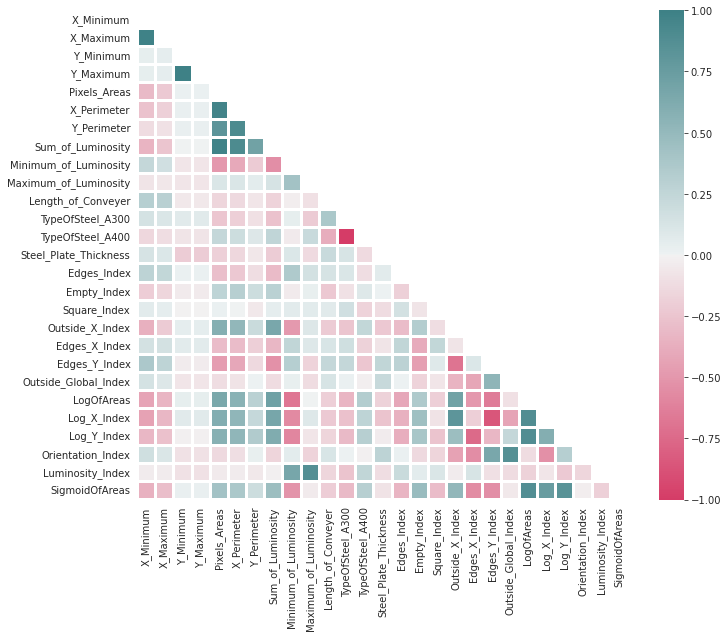

In [42]:
# heatmap을 그리기 위한 파라미터들 설정
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(1,200, as_cmap=True)

# (문제) 저장해둔 corr과 mask, cmap을 활용하여 correlation을 표현하는 heatmap을 그립니다. correlation에 맞게 최대, 최소, 중간값을 지정해줍니다.
# linewidths=2로 설정합니다. 그림 크기는 figsize=(11,9)로 설정합니다.

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, linewidths=2)

### 문제 8. Training, Test set 분리하기

In [43]:
x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['class']

In [44]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

In [45]:
# (문제) sklearn.model_selection.train_test_split을 활용하여, x_train, x_test, y_train, y_test로 데이터를 나눕니다
# 그 비율은 8:2로 합니다. y값에 따라 stratify하여 나눕니다.

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [46]:
# (문제) pandas.DataFrame.apply를 활용하여  x_train과 x_test를 표준화합니다.

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

## Step 2. 로지스틱 분류 모형


### 문제 9. [로지스틱 회귀분석] 로지스틱 기본 모형 만들기

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [48]:
# (문제) 로지스틱 회귀분석 모형을 만들어 lm에 저장합니다. solver는 'liblinear'로 설정합니다.

lm = LogisticRegression(solver='liblinear')

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 문제 10. [로지스틱 회귀분석] Grid Search 구축 (Lidge, Lasso Penalty / Threshold)

In [49]:
# (문제) 로지스틱에서 고려해야할 Penalty의 형태 (Ridge, Lasso), regularization parameter range를 설정하여 이를 parameters에 dictionary 형태로 저장합니다.

parameters = {'penalty':['l1', 'l2'], 'C':[0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'tol':[1e-4, 1e-2, 1, 1e2]}

In [50]:
# (문제) sklearn.model_selection.GridSearchCV를 활용해 cv값 10, n_jobs값은 n_thread로, scoreing은 "accuracy"로 Grid Search를 세팅하고 이를 GSLR에 저장합니다.

GSLR = GridSearchCV(lm, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')

In [51]:
# (문제) Grid Search를 fit함수를 활용하여 수행합니다.

GSLR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 0.01, 1, 100.0]},
             scoring='accuracy')

In [52]:
# 최적의 파라미터 값 및 정확도 (Accuracy) 출력
print('final params', GSLR.best_params_)   
print('best score', GSLR.best_score_)  

final params {'C': 1, 'penalty': 'l1', 'tol': 0.01}
best score 0.717808105872622


### 문제 11. [로지스틱 회귀분석] 모형 평가 및 최적 로지스틱 모형 구축

In [53]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장합니다.

pred = GSLR.predict(X_test)

In [54]:
y_test.shape, pred.shape, X_test.shape

((389,), (389,), (389, 26))

In [55]:
# (문제) sklearn.metrics.confusion_matrix 활용하여 confusion_matrix를 구하고 이를 출력합니다.

cMatrix = confusion_matrix(y_test, pred)
print(cMatrix)
print("\n Accuracy: ", GSLR.score(X_test, y_test))

[[54  0  0 24  2  0  1]
 [ 0  6  0  5  0  0  0]
 [ 5  0 69  2  2  0  0]
 [34  0  8 84  5  0  4]
 [ 4  0  0 13 14  0  1]
 [ 0  0  0  0  0 14  0]
 [ 2  0  0  8  0  0 28]]

 Accuracy:  0.6915167095115681


In [56]:
# (문제) sklearn.metrics.classification_report를 활용하여 report를 출력합니다.

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

       Bumps       0.55      0.67      0.60        81
   Dirtiness       1.00      0.55      0.71        11
   K_Scratch       0.90      0.88      0.89        78
Other_Faults       0.62      0.62      0.62       135
      Pastry       0.61      0.44      0.51        32
      Stains       1.00      1.00      1.00        14
   Z_Scratch       0.82      0.74      0.78        38

    accuracy                           0.69       389
   macro avg       0.78      0.70      0.73       389
weighted avg       0.70      0.69      0.69       389



In [57]:
# Cross validation 과정에서 계산된 정확도 값들을 출력해줍니다.
means = GSLR.cv_results_['mean_test_score']
stds = GSLR.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GSLR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.511 (+/-0.024) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.0001}
0.511 (+/-0.024) for {'C': 0.01, 'penalty': 'l1', 'tol': 0.01}
0.501 (+/-0.041) for {'C': 0.01, 'penalty': 'l1', 'tol': 1}
0.207 (+/-0.004) for {'C': 0.01, 'penalty': 'l1', 'tol': 100.0}
0.638 (+/-0.050) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.0001}
0.637 (+/-0.051) for {'C': 0.01, 'penalty': 'l2', 'tol': 0.01}
0.633 (+/-0.037) for {'C': 0.01, 'penalty': 'l2', 'tol': 1}
0.207 (+/-0.004) for {'C': 0.01, 'penalty': 'l2', 'tol': 100.0}
0.689 (+/-0.045) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.0001}
0.688 (+/-0.044) for {'C': 0.1, 'penalty': 'l1', 'tol': 0.01}
0.676 (+/-0.060) for {'C': 0.1, 'penalty': 'l1', 'tol': 1}
0.207 (+/-0.004) for {'C': 0.1, 'penalty': 'l1', 'tol': 100.0}
0.693 (+/-0.044) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.0001}
0.693 (+/-0.043) for {'C': 0.1, 'penalty': 'l2', 'tol': 0.01}
0.675 (+/-0.052) for {'C': 0.1, 'penalty': 'l2', 'tol': 1}
0.207 (+/-0.004) for {'C': 0.1, 'penalty': 'l2', 'tol': 100.0}


## Step 3. 의사결정나무 모형

### 문제 12. [의사결정나무] 의사결정나무 기본 모형 만들기

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
# (문제) 의사결정나무 모형을 만들어 dt에 저장합니다.

dt = DecisionTreeClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 문제 13. [의사결정나무] Grid Search 구축 (Loss function / Prunning)

In [60]:
# (문제) 의사결정나무에서 고려해야할 criterion, min_samples_split, max_depth, min_samples_leaf, max_features 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.

parameters={'criterion': ['gini', 'entropy'], 'min_samples_split':[2, 5, 10, 15], 'max_depth':[None, 2], 'min_samples_leaf':[1, 3, 10, 15], 'max_features':[None, 'sqrt', 'log2']}

In [61]:
GSDT=GridSearchCV(dt, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GSDT.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [62]:
print('final params', GSDT.best_params_)
print('ACC', GSDT.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 15}
ACC 0.7351902398676592


### 문제 14. [의사결정나무]  모형 평가 및 최적 의사결정나무 구축

In [63]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.

pred = GSDT.predict(X_test)
cMatrix = confusion_matrix(y_test, pred)
print(cMatrix)
print(round(GSDT.score(X_test, y_test), 3))
print(metrics.classification_report(y_test, pred))

[[33  1  0 40  3  0  4]
 [ 4  6  0  1  0  0  0]
 [10  0 63  4  0  0  1]
 [19  0  5 98  6  1  6]
 [ 4  0  0 16 12  0  0]
 [ 0  0  1  0  0 13  0]
 [ 0  0  0  7  0  0 31]]
0.658
              precision    recall  f1-score   support

       Bumps       0.47      0.41      0.44        81
   Dirtiness       0.86      0.55      0.67        11
   K_Scratch       0.91      0.81      0.86        78
Other_Faults       0.59      0.73      0.65       135
      Pastry       0.57      0.38      0.45        32
      Stains       0.93      0.93      0.93        14
   Z_Scratch       0.74      0.82      0.78        38

    accuracy                           0.66       389
   macro avg       0.72      0.66      0.68       389
weighted avg       0.66      0.66      0.65       389



In [64]:
# Train에서의 종속변수의 분포
print(y_train.value_counts())

Other_Faults    538
Bumps           321
K_Scratch       313
Z_Scratch       152
Pastry          126
Stains           58
Dirtiness        44
Name: class, dtype: int64


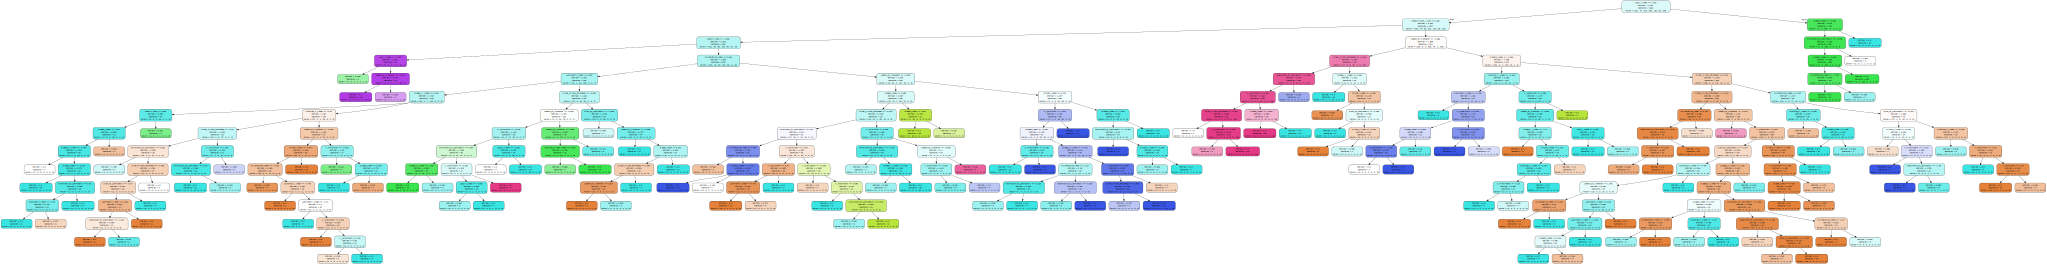

In [65]:
# 트리 시각화
import graphviz
from sklearn import tree

dt2=DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,min_samples_leaf=3,min_samples_split=10)
dt2.fit(X_train,y_train)
dot_data=tree.export_graphviz(dt2,feature_names=X_train.columns,filled=True,rounded=True)
graph=graphviz.Source(dot_data)
graph

## Step 4. Random Forest

### 문제 15. [Random Forest]  Random Forest 기본 모형 만들기

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# (문제) Random Forest 모형을 만들어 rf에 저장합니다.

rf = RandomForestClassifier()

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### 문제 16. [Random Forest] Grid Search 구축 (Loss function / Prunning / 변수 선택 / Tree 개수)

In [68]:
# (문제) Random Forest에서 고려해야할 n_estimators, min_samples_split, max_depth, min_samples_leaf, max_features 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.

parameters={'n_estimators':[50,100], 'criterion':['entropy'], 'min_samples_split':[2,5],
            'max_depth':[None,2], 'min_samples_leaf':[1,3,10], 'max_features':['sqrt']}
GSRF=GridSearchCV(rf, parameters, cv=10, n_jobs=n_thread, scoring="accuracy")
GSRF.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['entropy'], 'max_depth': [None, 2],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [69]:
print('final params', GSRF.best_params_)
print('best score', GSRF.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
best score 0.7802936311000828


### 문제 17. [Random Forest] 모형 평가 및 최적  Random Forest 구축

In [70]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.

pred = GSRF.predict(X_test)
cMatrix=confusion_matrix(y_test, pred)
print(cMatrix)
print(metrics.classification_report(y_test, pred))

[[ 24   1   0  49   1   3   3]
 [  1   8   0   2   0   0   0]
 [  0   0  74   4   0   0   0]
 [  7   0   1 120   0   4   3]
 [  2   0   0  24   5   0   1]
 [  0   0   0   0   0  14   0]
 [  0   0   0   9   0   0  29]]
              precision    recall  f1-score   support

       Bumps       0.71      0.30      0.42        81
   Dirtiness       0.89      0.73      0.80        11
   K_Scratch       0.99      0.95      0.97        78
Other_Faults       0.58      0.89      0.70       135
      Pastry       0.83      0.16      0.26        32
      Stains       0.67      1.00      0.80        14
   Z_Scratch       0.81      0.76      0.78        38

    accuracy                           0.70       389
   macro avg       0.78      0.68      0.68       389
weighted avg       0.74      0.70      0.67       389



## Step 5. Support Vector Machine

### 문제 18. [SVM] Support Vector Machine 기본 모형 만들기

In [71]:
from sklearn import svm

In [72]:
# (문제) Support Vector Machine을 만들어 svc에 저장합니다.

svc = svm.SVC()

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### 문제 19. [SVM] Grid Search 구축 (Regularization / Kernel / Gamma)

In [73]:
# (문제) Support Vector Machine에서 고려해야할 C, kernel, gamma 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.

parameters = {'C':[0.01, 0.1, 0.5, 0.9, 1, 5, 10], 'kernel':['linear', 'rbf', 'poly'], 'gamma':[0.1, 1, 10]}
GS_SVM = GridSearchCV(svc, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_SVM.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 5, 10],
                         'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [74]:
print('final params', GS_SVM.best_params_)
print('best score', GS_SVM.best_score_)

final params {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
best score 0.7712489660876758


### 문제 20. [SVM] 모형 평가 및 최적 Support Vector Machine 구축

In [75]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.

pred = GS_SVM.predict(X_test)
cMatrix = confusion_matrix(y_test, pred)
print(cMatrix)
print(metrics.classification_report(y_test, pred))

[[ 50   1   0  25   3   0   2]
 [  1   8   0   2   0   0   0]
 [  0   0  65  13   0   0   0]
 [ 22   1   2 100   5   1   4]
 [  4   0   0  17  10   0   1]
 [  0   0   0   0   0  14   0]
 [  1   0   0  10   0   0  27]]
              precision    recall  f1-score   support

       Bumps       0.64      0.62      0.63        81
   Dirtiness       0.80      0.73      0.76        11
   K_Scratch       0.97      0.83      0.90        78
Other_Faults       0.60      0.74      0.66       135
      Pastry       0.56      0.31      0.40        32
      Stains       0.93      1.00      0.97        14
   Z_Scratch       0.79      0.71      0.75        38

    accuracy                           0.70       389
   macro avg       0.76      0.71      0.72       389
weighted avg       0.72      0.70      0.70       389



## Step 6. 신경망 모형

### 문제 21. [ANN] 신경망 모형  기본 모형 만들기

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
# (문제) 신경망 모형을 만들어 ann_model에 저장합니다.

ann_model = MLPClassifier(random_state=1)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### 문제 22. [ANN] Grid Search 구축 (Hidden Layer 수 / Hidden node 수 / Regularization)

- 히든레이어는 많은 경우 1개로도 충분함.
- 히든 노드의 수는 아래와 같은 가이드라인 또한 존재하나, grid search를 통해서 찾는 것을 추천함.

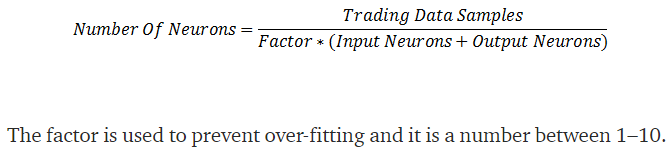

In [79]:
X_train.shape

(1552, 26)

In [91]:
1552/(10*(26+7))

4.703030303030303

In [92]:
1552/(1*(26+7))

47.03030303030303

### 문제 23. [ANN] 모형 평가 및 최적 신경망 모형 구축

In [82]:
# (문제) 신경망 모형에서 고려해야할 alpha, hidden_layer_sizes, activation등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.

parameters = {'alpha':[1e-3, 1e-1, 1e1], 'hidden_layer_sizes':[(5), (30), (60)], 'activation':['tanh', 'relu'], 'solver':['adam', 'lbfgs']}

GS_NN = GridSearchCV(ann_model, parameters, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1), n_jobs=4,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.001, 0.1, 10.0],
                         'hidden_layer_sizes': [5, 30, 60],
                         'solver': ['adam', 'lbfgs']},
             scoring='accuracy')

In [83]:
print('final params', GS_NN.best_params_)
print('best score', GS_NN.best_score_)

final params {'activation': 'tanh', 'alpha': 10.0, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
best score 0.7680272952853597


In [84]:
means = GS_NN.cv_results_['mean_test_score']
stds = GS_NN.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.706 (+/-0.037) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.715 (+/-0.083) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.746 (+/-0.046) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.694 (+/-0.055) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.741 (+/-0.058) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'adam'}
0.725 (+/-0.068) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.707 (+/-0.037) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'adam'}
0.709 (+/-0.081) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.747 (+/-0.036) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'adam'}
0.709 (+/-0.061) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_laye

In [98]:
parameters2={'alpha':[1e-3, 1e-1, 1e1, 1e2],'hidden_layer_sizes':[(5), (30), (60)],'activation':['tanh'],'solver':['lbfgs']}
GS_NN2=GridSearchCV(ann_model,parameters2,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_NN2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1), n_jobs=4,
             param_grid={'activation': ['tanh'],
                         'alpha': [0.001, 0.1, 10.0, 100.0],
                         'hidden_layer_sizes': [5, 30, 60],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [99]:
means = GS_NN2.cv_results_['mean_test_score']
stds = GS_NN2.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, GS_NN2.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

0.715 (+/-0.083) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.694 (+/-0.055) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.725 (+/-0.068) for {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.709 (+/-0.081) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.709 (+/-0.061) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.745 (+/-0.066) for {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.713 (+/-0.049) for {'activation': 'tanh', 'alpha': 10.0, 'hidden_layer_sizes': 5, 'solver': 'lbfgs'}
0.758 (+/-0.044) for {'activation': 'tanh', 'alpha': 10.0, 'hidden_layer_sizes': 30, 'solver': 'lbfgs'}
0.768 (+/-0.055) for {'activation': 'tanh', 'alpha': 10.0, 'hidden_layer_sizes': 60, 'solver': 'lbfgs'}
0.620 (+/-0.049) for {'activation': 'tanh', 'alpha': 100.0, 'hidden

In [97]:
parameters3 = {'alpha':[1e1, 1e2, 1e3], 'hidden_layer_sizes':[(30, 20), (30, 5)], 'activation':['tanh'], 'solver':['lbfgs']}    
GS_NN3 = GridSearchCV(ann_model, parameters3, cv=10, n_jobs=n_thread, scoring='accuracy')
GS_NN3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1), n_jobs=4,
             param_grid={'activation': ['tanh'], 'alpha': [10.0, 100.0, 1000.0],
                         'hidden_layer_sizes': [(30, 20), (30, 5)],
                         'solver': ['lbfgs']},
             scoring='accuracy')

In [100]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.

pred = GS_NN.predict(X_test)
cMatrix = confusion_matrix(y_test, pred)
print(cMatrix)
print(metrics.classification_report(y_test, pred))

[[52  0  0 24  3  0  2]
 [ 1  8  0  2  0  0  0]
 [ 1  0 72  5  0  0  0]
 [19  0  6 96  8  1  5]
 [ 2  0  0 15 14  0  1]
 [ 0  0  0  0  0 14  0]
 [ 1  1  0  7  0  0 29]]
              precision    recall  f1-score   support

       Bumps       0.68      0.64      0.66        81
   Dirtiness       0.89      0.73      0.80        11
   K_Scratch       0.92      0.92      0.92        78
Other_Faults       0.64      0.71      0.68       135
      Pastry       0.56      0.44      0.49        32
      Stains       0.93      1.00      0.97        14
   Z_Scratch       0.78      0.76      0.77        38

    accuracy                           0.73       389
   macro avg       0.77      0.74      0.76       389
weighted avg       0.73      0.73      0.73       389



https://playground.tensorflow.org

## Step 7. Boosting

### 문제 24. [Boosting] xgboost 기본 모형 만들기

In [101]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [102]:
# (문제) xgboost 모형을 만들어 xgb_model에 저장합니다. objective='binary:logistic'로 설정합니다.

xgb_model=xgb.XGBClassifier(objective='binary:logistic')

https://xgboost.readthedocs.io/en/latest/parameter.html

### 문제 25. [Boosting] xgboost Grid Search 구축 (Max depth / Tree 개수/ Gamma)

In [103]:
# (문제) xgboost에서 고려해야할 max_depth, min_child_weight, gamma, colsample_bytree, n_estimators 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.

parameters={
    'max_depth':[5,8],
    'min_child_weight':[1,5],
    'gamma':[0,1],
    'colsample_bytree':[0.8,1],
    'colsample_bylevel':[0.9,1],
    'n_estimators':[50,100]
}

In [104]:
GS_xgb=GridSearchCV(xgb_model,param_grid=parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_xgb.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=4,
             param_grid={'colsample_bylevel': [0.9, 1],
                         'colsample_bytree': [0.8, 1], 'gamma': [0, 1],
                         'max_depth': [5, 8], 'min_child_weight': [1, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

In [105]:
print('final params',GS_xgb.best_params_)
print('best score',GS_xgb.best_score_)

final params {'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50}
best score 0.8066956162117451


In [106]:
parameters2={
    'max_depth':[3,5,7],
    'min_child_weight':[1],
    'gamma':[0],
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'n_estimators':[100,150]
}

GS_xgb2=GridSearchCV(xgb_model,param_grid=parameters2,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_xgb2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=4,
             param_grid={'colsample_bylevel': [1], 'colsample_bytree': [1],
                         'gamma': [0], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1], 'n_estimators': [100, 150]},
             scoring='accuracy')

In [107]:
print('final params',GS_xgb2.best_params_)
print('best score',GS_xgb2.best_score_)

final params {'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
best score 0.7996112489660876


### 문제 26. [Boosting] 모형 평가 및 최적 xgboost 모형 구축

In [108]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.

predicted=GS_xgb2.predict(X_test)
cMatrix=confusion_matrix(y_test,predicted)
print(cMatrix)
print(metrics.classification_report(y_test,predicted))

[[29  0  0 20  4 25  3]
 [ 1  4  0  0  0  6  0]
 [ 2  0 72  1  0  3  0]
 [16  0  2 68  3 44  2]
 [ 2  0  1 12 13  4  0]
 [ 0  0  0  0  0 14  0]
 [ 1  0  0  2  0  7 28]]
              precision    recall  f1-score   support

       Bumps       0.57      0.36      0.44        81
   Dirtiness       1.00      0.36      0.53        11
   K_Scratch       0.96      0.92      0.94        78
Other_Faults       0.66      0.50      0.57       135
      Pastry       0.65      0.41      0.50        32
      Stains       0.14      1.00      0.24        14
   Z_Scratch       0.85      0.74      0.79        38

    accuracy                           0.59       389
   macro avg       0.69      0.61      0.57       389
weighted avg       0.71      0.59      0.62       389



### 문제 27. [Boosting] lightGBM 기본 모형 만들기

- xgboost에 비교할 때 성능은 비슷함.
- leaf-wise loss를 사용함. 
  - 시간과 메모리를 절약하여, fitting 속도 빠름.
  - 데이터의 수가 충분하지 않다면 과적합의 위험이 좀 더 높음.

In [109]:
import lightgbm as lgb

In [110]:
# (문제) lightgbm 모형을 만들어 lgbm_model에 저장합니다. objective='binary' 로 설정합니다.

lgbm_model=lgb.LGBMClassifier(objecve='binary')

https://lightgbm.readthedocs.io/en/latest/Parameters.html

###문제 28. [Boosting] lightGBM  Grid Search 구축 (Max depth / Tree 개수)

In [111]:
# (문제) lightGBM에서 주로 고려해야할 num_leaves, min_data_in_leaf, colsample_bytree, n_estimators 등을 고려하여 Grid search를 수행합니다.
# GridSearchCV의 옵션은 cv=10, n_jobs=n_thread, scoreing="accuracy"로 설정합니다.

parameters={
    'num_leaves':[32,64,128],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[100,150]
}

In [113]:
lgbm_model.fit(X_train, y_train)
predicted=lgbm_model.predict(X_test)
cMatrix=confusion_matrix(y_test,predicted)
print(cMatrix)
print(metrics.classification_report(y_test,predicted))

[[42  0  1 27  5  1  5]
 [ 3  3  0  5  0  0  0]
 [ 1  0 75  2  0  0  0]
 [20  0  4 99  5  4  3]
 [ 5  0  1 15 10  0  1]
 [ 0  0  0  0  0 14  0]
 [ 1  0  1  7  0  0 29]]
              precision    recall  f1-score   support

       Bumps       0.58      0.52      0.55        81
   Dirtiness       1.00      0.27      0.43        11
   K_Scratch       0.91      0.96      0.94        78
Other_Faults       0.64      0.73      0.68       135
      Pastry       0.50      0.31      0.38        32
      Stains       0.74      1.00      0.85        14
   Z_Scratch       0.76      0.76      0.76        38

    accuracy                           0.70       389
   macro avg       0.73      0.65      0.66       389
weighted avg       0.70      0.70      0.69       389



In [ ]:
GS_lgbm=GridSearchCV(lgbm_model,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GS_lgbm.fit(X_train,y_train)

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [ ]:
print('final params',GS_lgbm.best_params_)
print('best score',GS_lgbm.best_score_)

### 문제 29. [Boosting] 모형 평가 및 최적 lightGBM 모형 구축

In [ ]:
# (문제) predict 함수를 활용하여 예측 값을 구해 이를 predicted 에 저장하고 이를 출력하며 classification_report 또한 출력합니다.

predicted=GS_lgbm.predict(X_test)
cMatrix=confusion_matrix(y_test,predicted)
print(cMatrix)
print(metrics.classification_report(y_test,predicted))